<a href="https://colab.research.google.com/github/Abinaya-J/Udacity_Intro_to_Data_Science/blob/master/Subway_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Accessing data and converting it into a dataframe**

In [ ]:
import pandas 
weather_data = pandas.read_csv('/content/weather-underground.csv')
print(weather_data.head())

         date  maxpressurem  maxdewptm  ...  meantempi  maxvism  meantempm
0  2011-05-01          1026          6  ...         60       16         16
1  2011-05-02          1026         10  ...         57       16         14
2  2011-05-03          1021         15  ...         65       16         18
3  2011-05-04          1017         14  ...         55       16         13
4  2011-05-05          1016          4  ...         56       16         13

[5 rows x 70 columns]


**Using SQL queries and functions**



In [ ]:
!pip install -U pandasql
import pandasql

In [ ]:
#Finding the number of rainy days - the query counts the number of rows which have "1" under the column named "rain"

q = """SELECT COUNT(date) num_days_rained
    FROM weather_data
    WHERE CAST(rain AS integer) = 1;"""

rainy_days = pandasql.sqldf(q.lower(), locals())
print(rainy_days)

   num_days_rained
0               10


In [ ]:
#Finding the maximum temperature on foggy and not foggy days

q = """SELECT fog,MAX(CAST(maxtempi AS integer)) max_temp
    FROM weather_data
    GROUP BY 1;"""

max_temp = pandasql.sqldf(q.lower(), locals())
print(max_temp)

   fog  max_temp
0    0        86
1    1        81


In [ ]:
#Finding the mean temperature during weekends
#cast (strftime('%w', date) as integer) will return 0 if the date is a Sunday or 6 if the date is a Saturday

q = """SELECT AVG(CAST(meantempi AS integer)) avg_mean_temp
    FROM weather_data
    WHERE CAST(strftime('%w', date) AS integer) IN (0,6);"""

mean_temp_weekends = pandasql.sqldf(q.lower(), locals())
print(mean_temp_weekends)

   avg_mean_temp
0      65.111111


In [ ]:
#Finding the mean temperature, pressure and dew on rainy/not rainy and foggy/not foggy days

q = """SELECT fog, rain , AVG(CAST(meantempi AS integer)) mean_temp, AVG(CAST(meandewpti AS integer)) mean_dew, AVG(CAST(meanpressurei AS integer)) mean_pressure
    FROM weather_data
    GROUP BY 1,2;"""

all_mean = pandasql.sqldf(q.lower(), locals())
print(all_mean)

   fog  rain  mean_temp   mean_dew  mean_pressure
0    0     0  64.526316  49.263158      29.421053
1    0     1  62.500000  57.333333      29.166667
2    1     0  74.000000  64.000000      29.000000
3    1     1  63.500000  59.500000      29.250000


 
**Applying statistics**
*   Mann Whitney U-test



In [1]:
import numpy as np
import scipy
import scipy.stats
import pandas

In [6]:
turnstile_weather= pandas.read_csv('/content/turnstile_data_master_with_weather.csv')

with_rain = turnstile_weather[turnstile_weather['rain']==1]['ENTRIESn_hourly']
without_rain = turnstile_weather[turnstile_weather['rain']==0]['ENTRIESn_hourly']

with_rain_mean = np.mean(with_rain)
without_rain_mean = np.mean(without_rain)

print('Mean of entries with rain: {}'.format(with_rain_mean))
print('Mean of entries without rain: {}'.format(without_rain_mean))

Mean of entries with rain: 1105.4463767458733
Mean of entries without rain: 1090.278780151855


In [13]:
#Two sided test
U,p = scipy.stats.mannwhitneyu(with_rain,without_rain, alternative ='two-sided')
print(p)

0.04988078458898671


In [11]:
#One sided test
#Null hypothesis - Ridership without rain is less or equal to ridership without rain
#Alternative hypothesis -Ridership without rain is greater than ridership with rain

U,p = scipy.stats.mannwhitneyu(with_rain,without_rain, alternative ='greater')

print('p value for the one sided test : {}'.format(p))

p value for the one sided test : 0.024940392294493356


**Visualizing analysis**

*   Histogram
*   Line chart
*   Scatter plot





<Figure size 432x288 with 0 Axes>

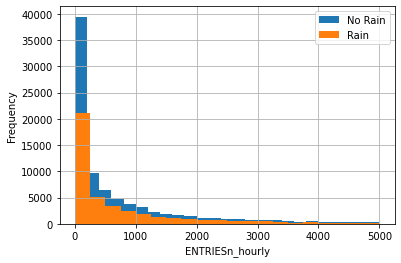

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

plt.figure()

# code to plot a historgram for hourly entries when it is not raining
non_rainy_data = turnstile_weather[turnstile_weather['rain'] == 0]['ENTRIESn_hourly']
non_rainy_data.hist(range = [0, 5000], bins = 25, label='No Rain')

# code to plot a historgram for hourly entries when it is raining
rainy_data = turnstile_weather[turnstile_weather['rain'] == 1]['ENTRIESn_hourly']
rainy_data.hist(range = [0, 5000], bins = 20, label='Rain')

plt.xlabel('ENTRIESn_hourly')
plt.ylabel('Frequency')
plt.legend()

plt.figure()

In [ ]:
!pip install ggplot

In [ ]:
!pip install pandas plotnine

In [ ]:
# Line chart to show the changes in average ridership during different days of the week

from plotnine import *

turnstile_weather= pandas.read_csv('/content/turnstile_data_master_with_weather.csv')
df = turnstile_weather[['DATEn', 'ENTRIESn_hourly']]

#cast (strftime('%w', date) as integer) will return 0 if the date is a Sunday or 6 if the date is a Saturday

q = """SELECT CAST(strftime('%w', DATEn) AS integer) AS day_of_week,SUM(ENTRIESn_hourly)/count(*) AS hourlyentries
       FROM df
       GROUP BY CAST(strftime('%w', DATEn) AS integer); """

#Execute SQL command against the pandas dataframe
plot_data = pandasql.sqldf(q.lower(), locals())
print(plot_data)



   day_of_week  hourlyentries
0            0     604.620120
1            1    1084.888769
2            2    1307.073259
3            3    1335.901803
4            4    1305.176382
5            5    1333.800773
6            6     809.925317


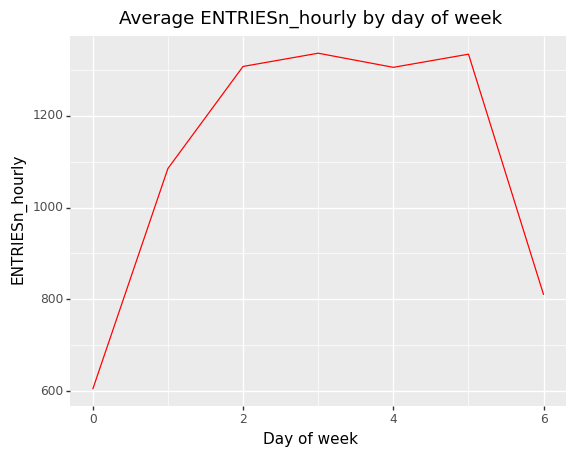

<ggplot: (-9223363303454345440)>

In [ ]:
ggplot(plot_data, aes('day_of_week', 'hourlyentries')) + geom_line(color='red') +  ggtitle('Average ENTRIESn_hourly by day of week') + ylab('ENTRIESn_hourly') + xlab('Day of week')

In [ ]:
df_1 = turnstile_weather[['DATEn', 'meantempi']]

s = """SELECT CAST(strftime('%w', DATEn) AS integer) AS day_of_week, AVG(CAST(meantempi AS integer)) AS mean_temperature
       FROM df_1
       GROUP BY cast(strftime('%w', DATEn) AS integer); """

scatter_data = pandasql.sqldf(s.lower(), locals())
print(scatter_data)

   day_of_week  mean_temperature
0            0         63.573329
1            1         63.313146
2            2         64.716738
3            3         63.267717
4            4         64.488024
5            5         63.960328
6            6         67.020761


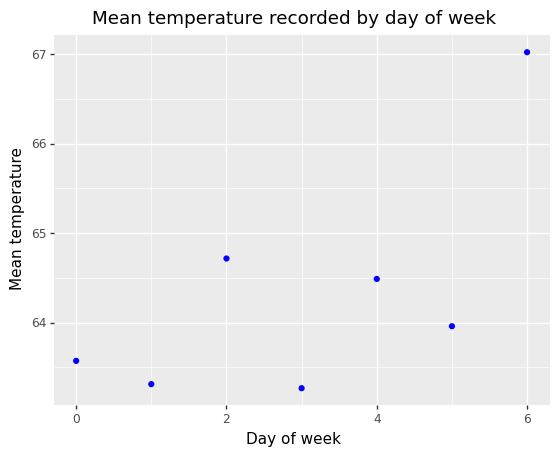

<ggplot: (8733420850871)>

In [ ]:
ggplot(scatter_data, aes('day_of_week', 'mean_temperature')) + geom_point(color='blue') +  ggtitle('Mean temperature recorded by day of week') + ylab('Mean temperature') + xlab('Day of week')